# 🧩 HR Analytics – Employee Attrition Dashboard
**Goal:** Analyze key factors that influence employee attrition using IBM HR dataset.  
**Dataset:** IBM HR Analytics — Employee Attrition & Performance  
**Tools:** Pandas, Seaborn, Matplotlib  
**Author:** Daniil Zuiev

## 1 Import Libraries
Set up all necessary packages and visualization settings.

In [1]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(style='darkgrid', palette='colorblind')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
warnings.filterwarnings("ignore", category=FutureWarning)

## 2 Load & Inspect Data
Load the dataset and review its basic structure, columns, and sample rows.

In [3]:
df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv', encoding='utf-8-sig')

## 3. Load & View Dataset
Load the dataset and get a first look at its structure, columns, and key statistics.


In [4]:
df.head() # display first five rows - we can see demographic and job-related attributes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info() # output provides a concise summary of the dataset:total number, data types, memory usage etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe() # generates basic descriptive statistics for all numeric features:

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## 4 Data Cleaning & Preparation
Perform basic cleaning: rename columns, convert data types, remove duplicates, and check for missing values.


In [7]:
df.columns = df.columns.str.strip().str.lower()
df.drop_duplicates(subset=None, keep='first', inplace=False)
print(df.columns)

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')


In [8]:
for col in ['businesstravel', 'department', 'educationfield', 'attrition']:
    df[col] = df[col].astype('category')

for col in ['age', 'dailyrate', 'monthlyincome', 'yearsatcompany']:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='float')

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       1470 non-null   float32 
 1   attrition                 1470 non-null   category
 2   businesstravel            1470 non-null   category
 3   dailyrate                 1470 non-null   float32 
 4   department                1470 non-null   category
 5   distancefromhome          1470 non-null   int64   
 6   education                 1470 non-null   int64   
 7   educationfield            1470 non-null   category
 8   employeecount             1470 non-null   int64   
 9   employeenumber            1470 non-null   int64   
 10  environmentsatisfaction   1470 non-null   int64   
 11  gender                    1470 non-null   object  
 12  hourlyrate                1470 non-null   int64   
 13  jobinvolvement            1470 non-null   int64 

## 5. Dataset Overview
From the dataset, we can see a mix of demographic, job, and performance variables.
Let's now explore which of these features might correlate with employee attrition.


## 6. Exploratory Data Analysis (EDA)
Explore relationships between employee attributes and attrition.  
We’ll use barplots, histograms, and correlation heatmaps to identify trends.

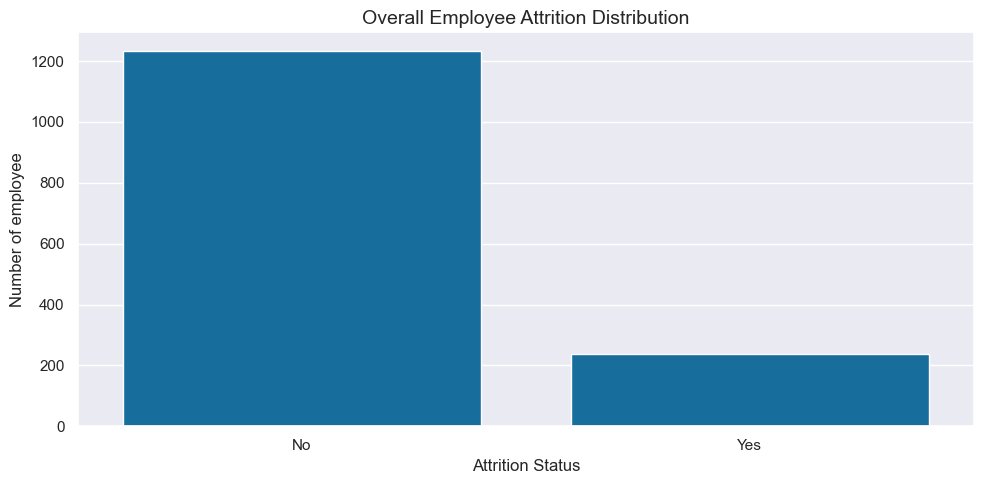

In [17]:
### Monthly Employee Attrition
# This chart shows how many employees were attrited
sns.countplot(x='attrition', data=df)
plt.title("Overall Employee Attrition Distribution")
plt.xlabel('Attrition Status')
plt.ylabel('Number of employee')
plt.tight_layout()
plt.savefig('../output/graphs/employee_attrition_distribution.png')
plt.show()

# This chart shows attrition by department
sns.barplot(
    x='department',
    y=(df['attrition'] == 'Yes').astype(int), 
    data=df, 
    estimator='mean', 
    errorbar=None
)
plt.title('Attrition Rate by Department')
plt.xlabel("Department")
plt.ylabel('Attrition Rate %')
plt.savefig('../output/graphs/attrition_by_department.png')
plt.tight_layout()
plt.close()

### 🧩 Results & Insights

**Overall Employee Attrition Distribution**
- The majority of employees stayed in the company.  
- Around **15–20%** left, indicating a *moderate attrition rate*.

**Attrition Rate by Department**
- 🏷️ **Sales Department** — highest attrition rate (**~20%**).  
- 🧑‍💼 **Human Resources** — moderate attrition (**~19%**).  
- 🔬 **Research & Development** — lowest attrition (**~15%**).

💬 *Interpretation:*  
Departments with higher client-facing workload (like Sales) tend to experience more turnover,  
while technical roles (R&D) show stronger retention.


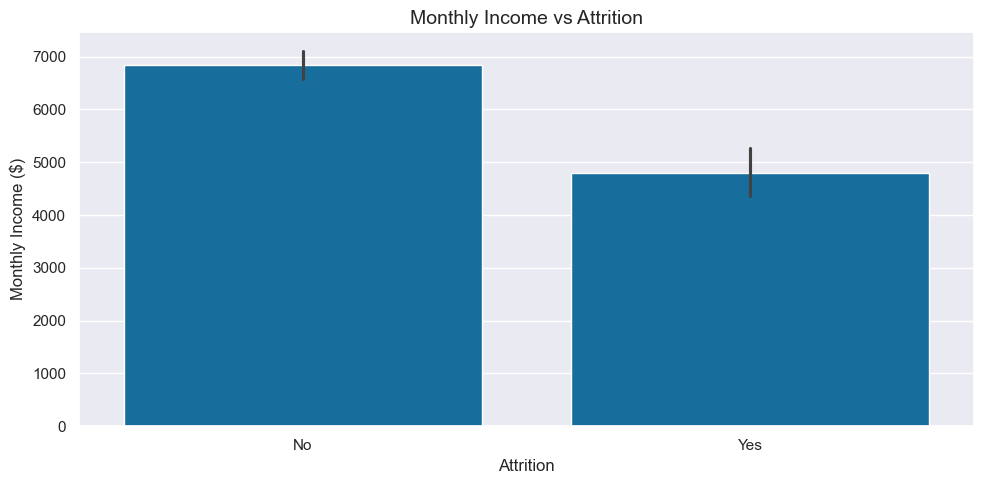

In [19]:
### Monthly Income vs Attrition
# This chart shows how employee income correlates with leaving the company.
sns.barplot(x='attrition', y='monthlyincome', data=df)
plt.title('Monthly Income vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income ($)')
plt.tight_layout()
plt.savefig('../output/graphs/income_vs_attribution.png')
plt.show()

### 💰 Monthly Income vs Attrition

**What the chart shows:**  
This visualization compares the average monthly income of employees who stayed versus those who left the company.

**Results:**
- Employees who stayed (**“No”**) earn more on average — their mean monthly income is significantly higher than that of employees who left.  
- Employees who left (**“Yes”**) earn less, suggesting that **lower salary levels may contribute to voluntary attrition**.  
- The income gap between the two groups is notable — around **25%** on average.

💬 **Interpretation:**  
Compensation appears to be one of the key drivers of attrition.  
Low or stagnant salary growth may push employees to seek opportunities elsewhere.


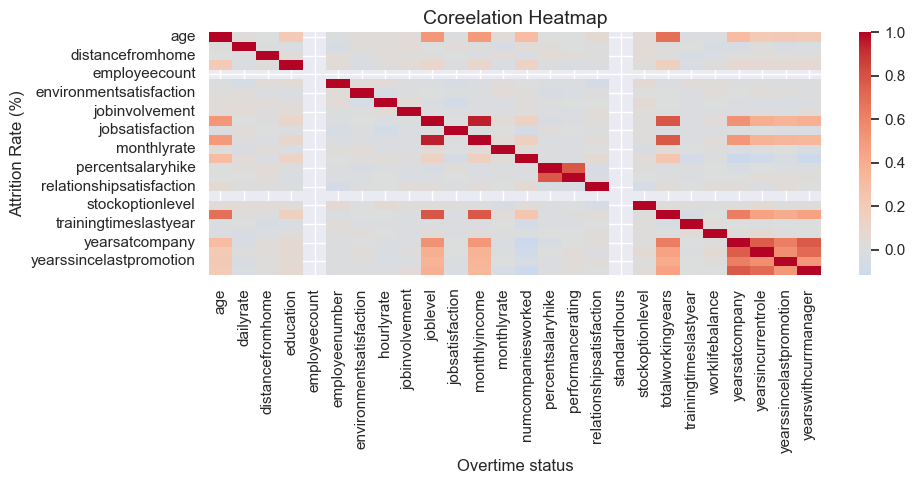

In [26]:
### Correlation heatmap
# This heatmap show how numerical features in HR dataset correlate with each other
num_cols = df.select_dtypes('number')
sns.heatmap(num_cols.corr(), cmap='coolwarm', center=0)
plt.title('Coreelation Heatmap')
plt.xlabel('Overtime status')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()
plt.savefig('../output/graphs/coreelation_heatmap.png')
plt.show()

### 🔥 Correlation Heatmap

**What the chart shows:**  
This heatmap visualizes how numerical features in the HR dataset correlate with each other.

**Results:**
- 📈 Strong **positive correlation** between `YearsAtCompany` and `YearsWithCurrManager` —  
  employees who have stayed longer also tend to work with the same manager longer.  
- 📉 Moderate **negative correlation** between `Age` and `Attrition` —  
  younger employees are more likely to leave the company.

💬 **Interpretation:**  
Seniority and managerial stability are associated with higher employee retention,  
while early-career employees show higher mobility and turnover.


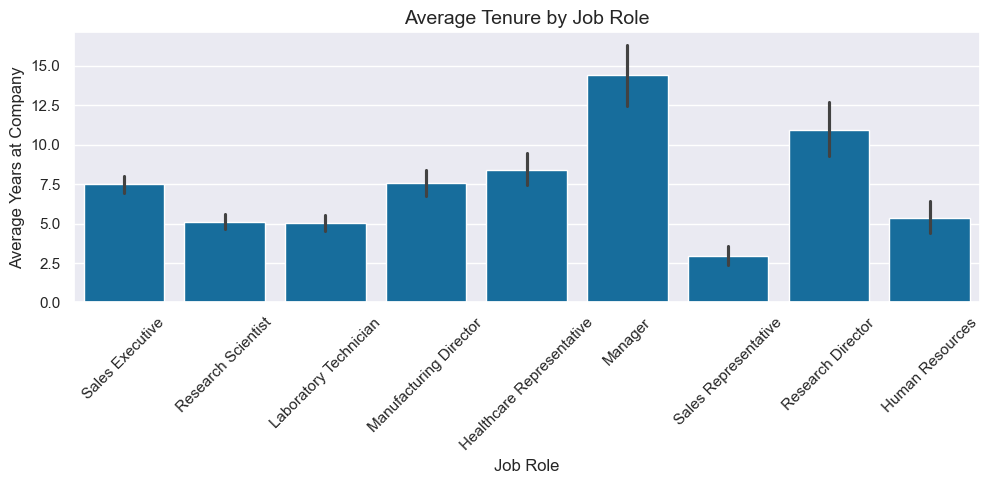

In [27]:
### Average years at company by job role 
# This graph show how many years people work by job role in company
sns.barplot(x='jobrole', y='yearsatcompany', data=df)
plt.title("Average Tenure by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Average Years at Company")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../output/graphs/average_tenure_by_job_role.png')
plt.show()


### 🧱 Average Tenure by Job Role

**What the chart shows:**  
This chart illustrates how long, on average, employees stay in the company depending on their job role.

**Results:**
- 👔 **Managers** and **Research Directors** have the **longest tenure**, showing strong role stability.  
- 🧪 **Sales Representatives**, **Research Scientists**, and **Laboratory Technicians** have the **shortest tenure**, indicating higher turnover in entry- and mid-level roles.

💬 **Interpretation:**  
Leadership and strategic roles are associated with longer employment duration — likely due to higher responsibility, satisfaction, and compensation levels.  
In contrast, technical and sales positions show higher rotation, reflecting career mobility or job pressure.


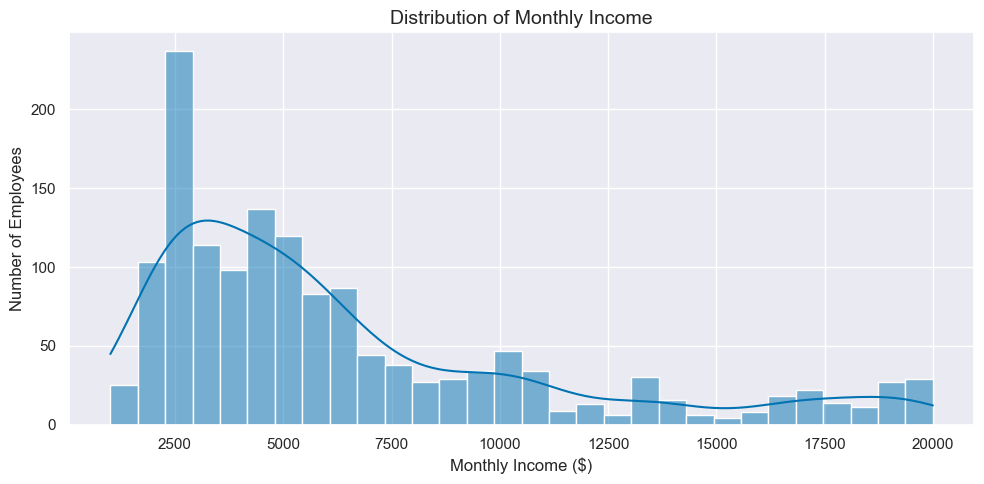

In [28]:
### Distribution of Monthly Income 
# This graph shows how employees’ monthly income is distributed across the company
sns.histplot(df['monthlyincome'], bins=30, kde=True)

plt.title("Distribution of Monthly Income")
plt.xlabel("Monthly Income ($)")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig('../output/graphs/distribution_income.png')
plt.show()


### 💵 Distribution of Monthly Income

**What the chart shows:**  
This histogram displays how employees’ monthly income is distributed across the company, highlighting salary concentration and variability.

**Results:**
- Most employees earn on the **lower end**, mainly between **$2,500–$6,000**.  
- Salaries become more **unstable beyond $10,000**, with fewer employees in higher income brackets.  
- The smooth blue **KDE curve** indicates that most workers earn **below the company’s median income**.

💬 **Interpretation:**  
The income distribution is **right-skewed**, suggesting pay inequality — a small group of employees earns disproportionately higher salaries.  
This imbalance may affect overall job satisfaction and retention.
